In [1]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

C:\Users\rafal\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## Example I

In [2]:
X,y = make_blobs(n_samples=120, n_features=2, centers=4, cluster_std=0.4)
X.shape

(120, 2)

In [3]:
y.shape

(120,)

In [4]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
y_out = kmeans.labels_

Text(0.5, 1.0, 'Kmeans labeled')

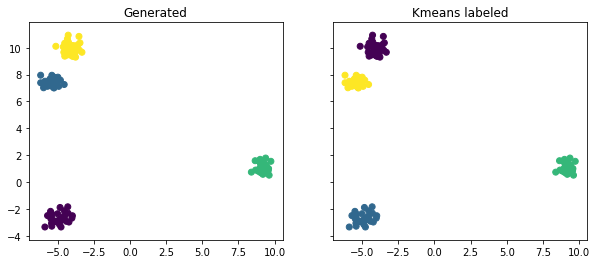

In [5]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_figwidth(10)
ax1.scatter(X[:,0], X[:,1], marker='o', c=y)
ax1.set_title('Generated')
ax2.scatter(X[:,0], X[:,1], marker='o', c=y_out)
ax2.set_title('Kmeans labeled')

### The points were labeled correctly

In [6]:
print("Inertia = ", kmeans.inertia_)

Inertia =  35.759925156026156


## Example II

In [7]:
X,y = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.5)
kmeans_5 = KMeans(n_clusters=5, random_state=0).fit(X)
y_out_5 = kmeans_5.labels_
kmeans_2 = KMeans(n_clusters=2, random_state=0).fit(X)
y_out_2 = kmeans_2.labels_

Text(0.5, 1.0, 'For 2 clusters')

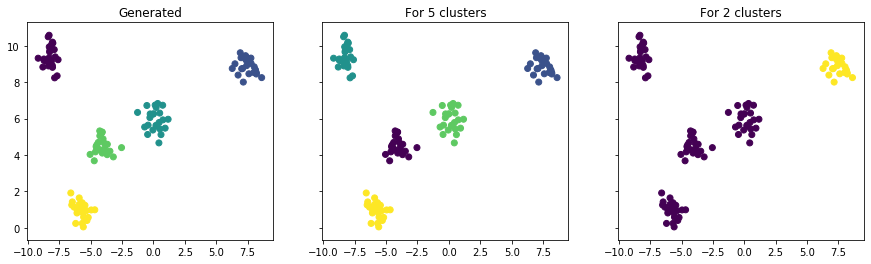

In [8]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
f.set_figwidth(15)
ax1.scatter(X[:,0], X[:,1], marker='o', c=y)
ax1.set_title('Generated')
ax2.scatter(X[:,0], X[:,1], marker='o', c=y_out_5)
ax2.set_title('For 5 clusters')
ax3.scatter(X[:,0], X[:,1], marker='o', c=y_out_2)
ax3.set_title('For 2 clusters')

In [9]:
print("Inertia for 5 clusters = ", kmeans_5.inertia_)

Inertia for 5 clusters =  60.986741232248995


In [10]:
print("Inertia for 2 clusters = ", kmeans_2.inertia_)

Inertia for 2 clusters =  1835.0139727485198


## K-means ++

In [11]:
kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(X)
y_out_5 = kmeans_5.labels_
kmeans_2 = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(X)
y_out_2 = kmeans_2.labels_

Text(0.5, 1.0, 'For 2 clusters')

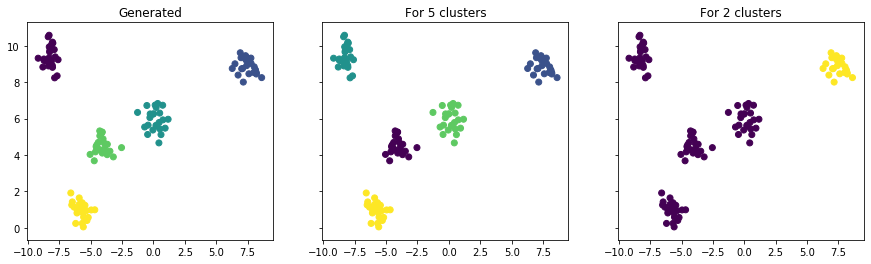

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
f.set_figwidth(15)
ax1.scatter(X[:,0], X[:,1], marker='o', c=y)
ax1.set_title('Generated')
ax2.scatter(X[:,0], X[:,1], marker='o', c=y_out_5)
ax2.set_title('For 5 clusters')
ax3.scatter(X[:,0], X[:,1], marker='o', c=y_out_2)
ax3.set_title('For 2 clusters')

In [13]:
print("Inertia for 5 clusters = ", kmeans_5.inertia_)

Inertia for 5 clusters =  60.986741232248995


In [14]:
print("Inertia for 2 clusters = ", kmeans_2.inertia_)

Inertia for 2 clusters =  1835.0139727485198


## Elbow method

In [15]:
X,y = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.6)

In [16]:
elbow_inertias = []
for n_clust in range (2,10):
    kmeans = KMeans(n_clusters=n_clust, random_state=0).fit(X)
    elbow_inertias.append(kmeans.inertia_)


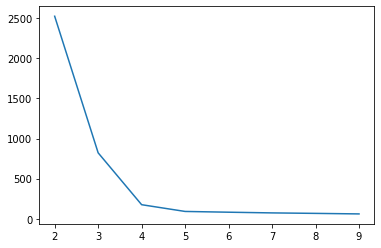

In [17]:
plt.plot(range(2,10), elbow_inertias)

### There were generated 5 clusters. The plot for elbow method shows that k=5 is a proper number of clusters

In [18]:
from sklearn.datasets.samples_generator import make_moons
import seaborn as sns
import pandas as pd
 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])
#TODO: Kmeans
 

In [19]:
elbow_inertias = []
elbow_y = []
for n_clust in range (2,18):
    kmeans = KMeans(n_clusters=n_clust, random_state=0).fit(X_moon)
    elbow_inertias.append(kmeans.inertia_)
    elbow_y = kmeans.labels_

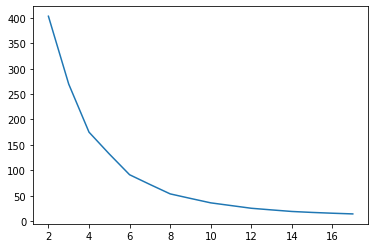

In [20]:
plt.plot(range(2,18), elbow_inertias)

### It's hard to choose proper k based on elbow method. I'm choosing k = 14

In [21]:
y_km = elbow_y[12-2] #because the range starts from 2
centers = kmeans.cluster_centers_

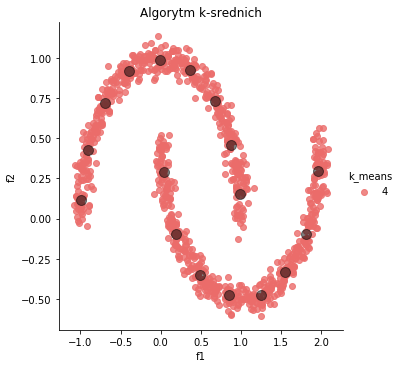

In [22]:
#Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()